<h2 align=center>Tumor Diagnosis (Part 1): Exploratory Data Analysis</h2>

## About the Dataset

The Breast Cancer Diagnostic dataset is accessible from the UCI Machine Learning Repository or the UW CS ftp server. The data comprises features that are derived from digitized images of fine needle aspirates (FNA) of breast masses, providing characteristics of the cell nuclei present in the image. The dataset employs a 3-dimensional space as described in Bennett and Mangasarian's paper on robust linear programming discrimination.

The dataset consists of an ID number, a diagnosis indicating malignancy (M) or benignancy (B), and ten real-valued features computed for each cell nucleus. These features include measurements such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. Mean, standard error, and the "worst" or largest values (mean of the three largest values) of these features were calculated for each image, resulting in 30 features. For example, Mean Radius corresponds to field 3, Radius SE to field 13, and Worst Radius to field 23.

All feature values are coded to four significant digits, and there are no missing attribute values. The dataset has a class distribution of 357 benign and 212 malignant cases.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

<h2 align=center> Exploratory Data Analysis </h2>


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
columns = df.columns
print (columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
y = df.diagnosis
drop_cols = ['Unnamed: 32', 'id', 'diagnosis']
x = df.drop(drop_cols, axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign Tumors 357
Number of Malgnant Tumors 212


/home/ahmad/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


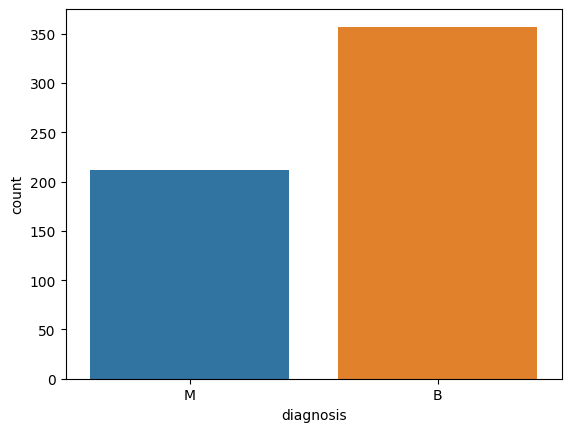

In [6]:
ax = sns.countplot(y, label = 'Count')
B, M = y.value_counts()
print('Number of Benign Tumors', B)
print('Number of Malgnant Tumors', M)

In [7]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


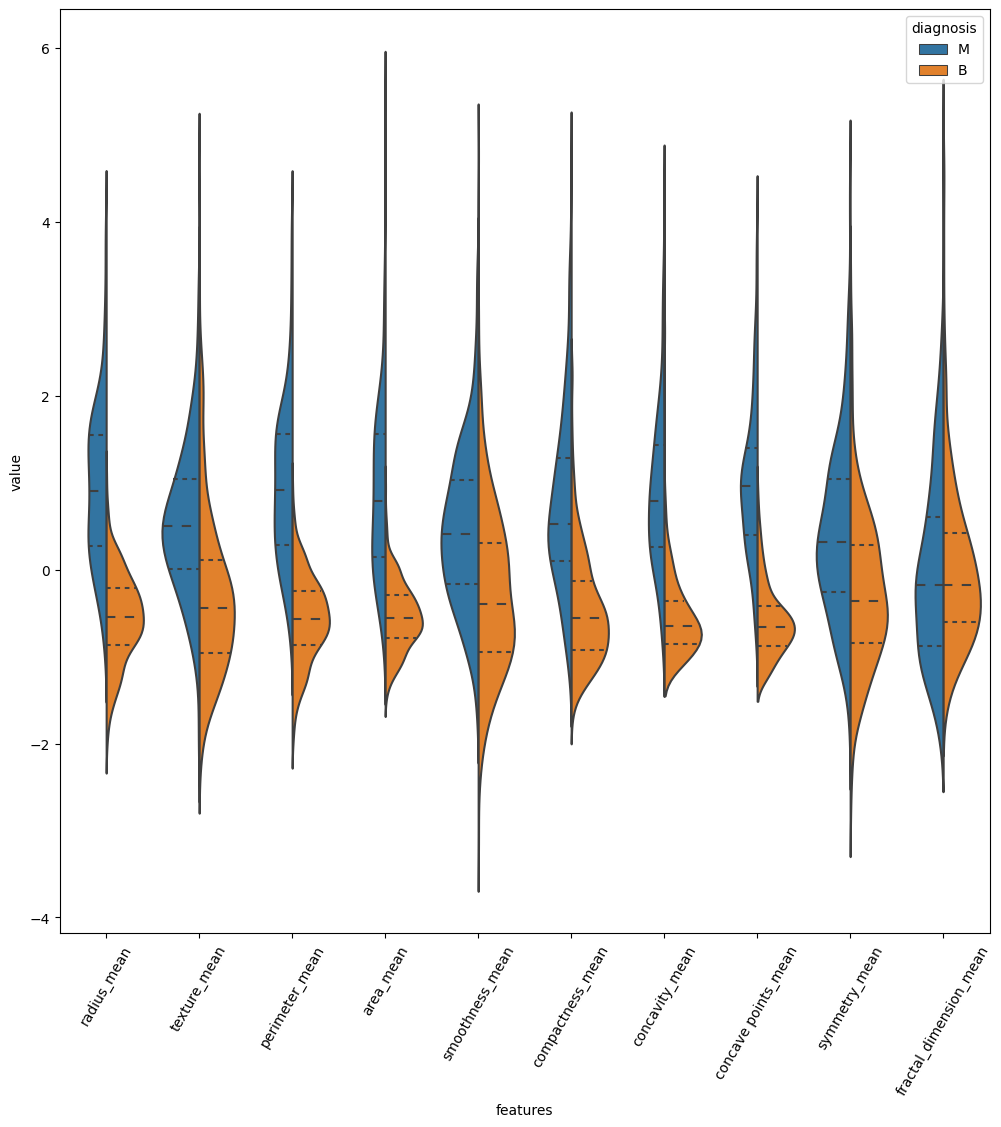

In [8]:
df = x
df_std = (df - df.mean()) / df.std()
df = pd.concat([y, df_std.iloc[:, 0:10]], axis = 1)
df = pd.melt(df, id_vars = 'diagnosis',
             var_name = 'features',
             value_name = 'value')

plt.figure(figsize = (12,12))
sns.violinplot( x ='features', y='value', hue = 'diagnosis', data = df, split = True, inner = 'quart')
plt.xticks(rotation = 60)
plt.show()


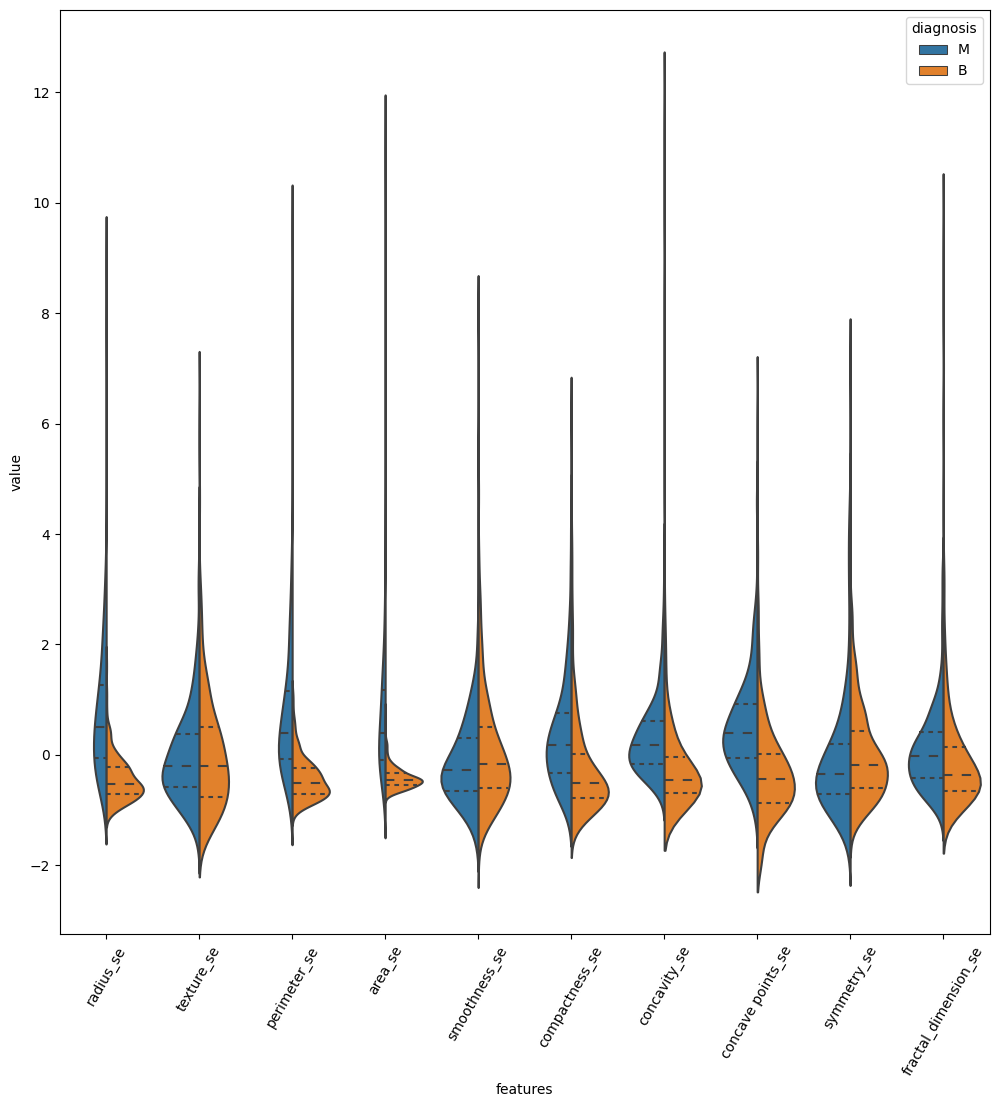

In [9]:
df = x
df_std = (df - df.mean()) / df.std()
df = pd.concat([y, df_std.iloc[:, 10:20]], axis = 1)
df = pd.melt(df, id_vars = 'diagnosis',
             var_name = 'features',
             value_name = 'value')

plt.figure(figsize = (12,12))
sns.violinplot( x ='features', y='value', hue = 'diagnosis', data = df, split = True, inner = 'quart')
plt.xticks(rotation = 60)
plt.show()

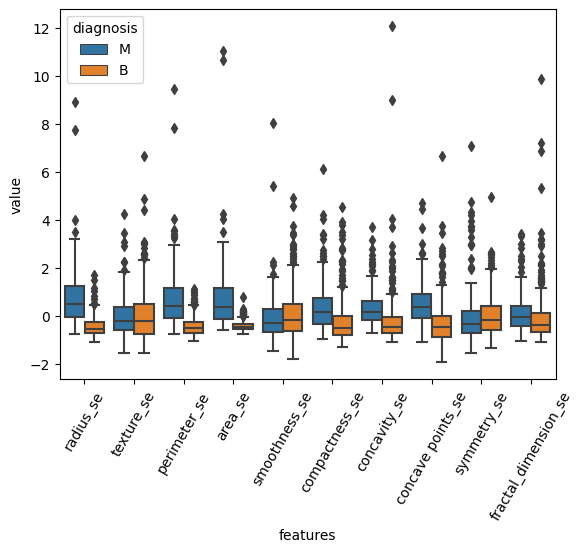

In [10]:
sns.boxplot(x = 'features', y = 'value', hue = 'diagnosis', data = df)
plt.xticks(rotation = 60)
plt.show()

In [31]:
df.head(4)

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233


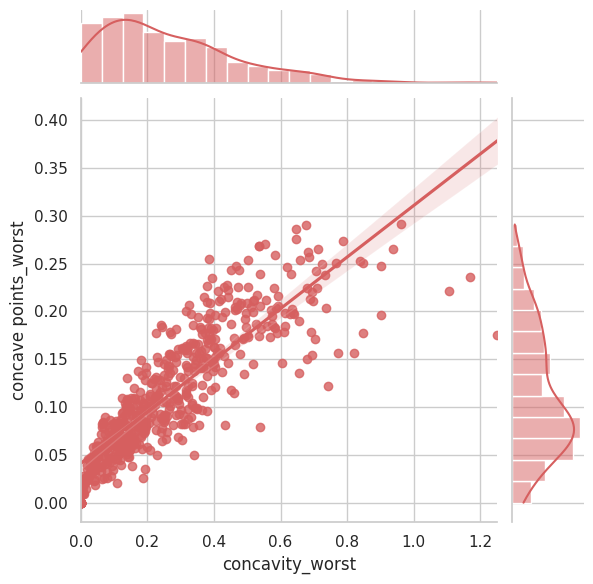

In [32]:
sns.jointplot(x='concavity_worst', y='concave points_worst', kind='reg', color='r', data=x)
plt.show()


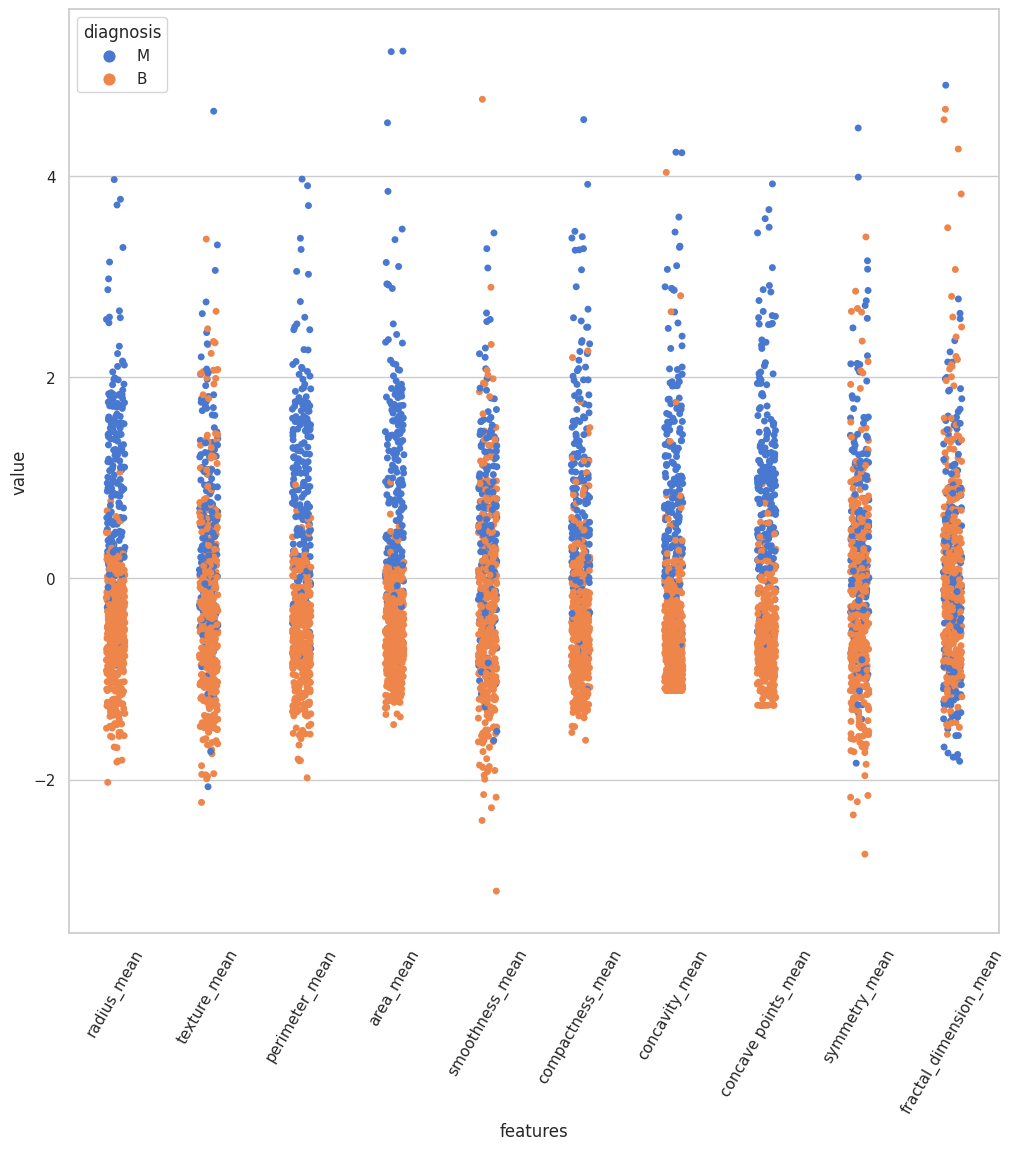

In [22]:
sns.set(style = 'whitegrid', palette = 'muted')
df = x
df_std = (df - df.mean()) / df.std()
df = pd.concat([y, df_std.iloc[:, 0:10]], axis = 1)
df = pd.melt(df, id_vars = 'diagnosis',
             var_name = 'features',
             value_name = 'value')

plt.figure(figsize = (12,12))
sns.stripplot( x ='features', y='value', hue = 'diagnosis', data = df)
plt.xticks(rotation = 60)
plt.show()

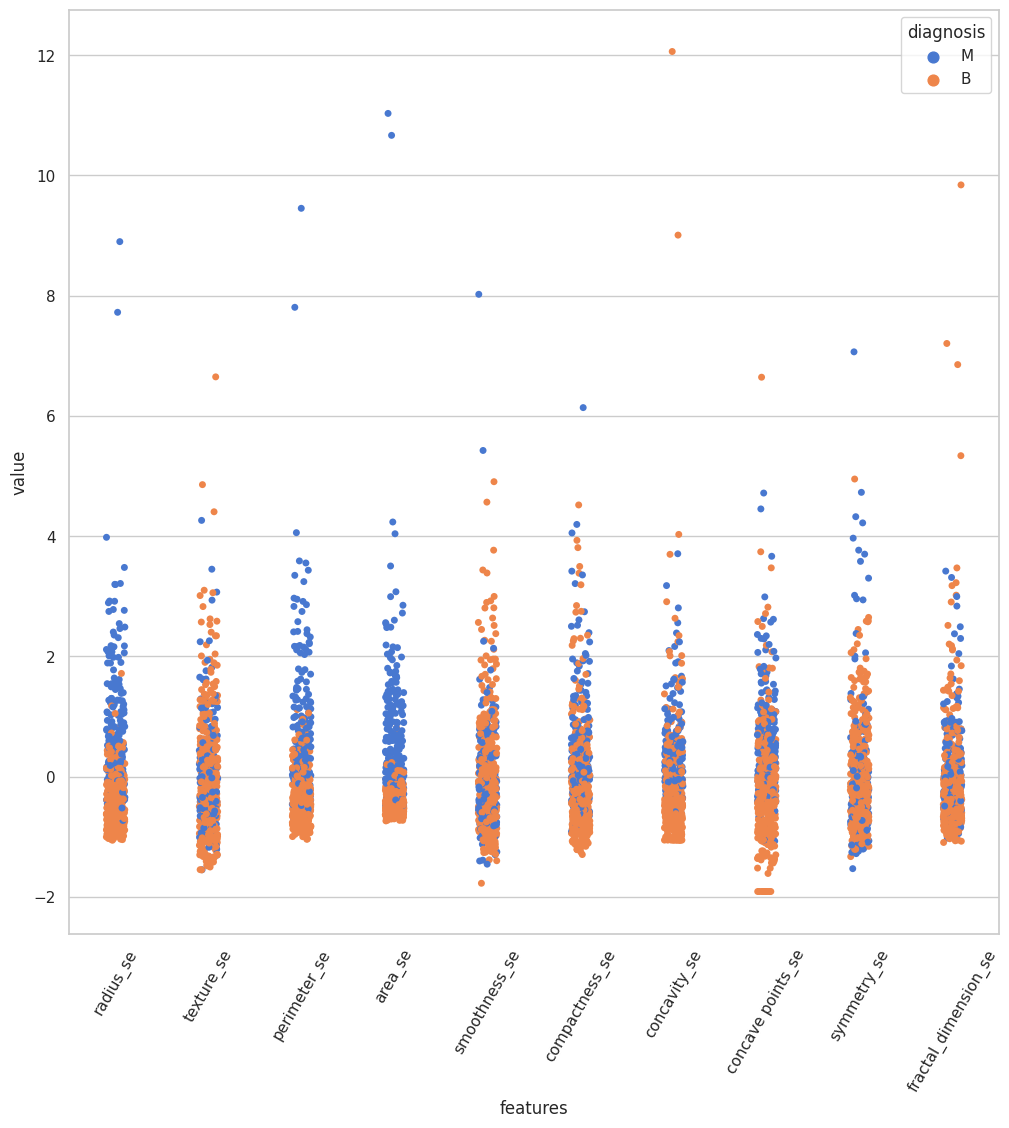

In [20]:
sns.set(style = 'whitegrid', palette = 'muted')
df = x
df_std = (df - df.mean()) / df.std()
df = pd.concat([y, df_std.iloc[:, 10:20]], axis = 1)
df = pd.melt(df, id_vars = 'diagnosis',
             var_name = 'features',
             value_name = 'value')

plt.figure(figsize = (12,12))
sns.stripplot( x ='features', y='value', hue = 'diagnosis', data = df)
plt.xticks(rotation = 60)
plt.show()

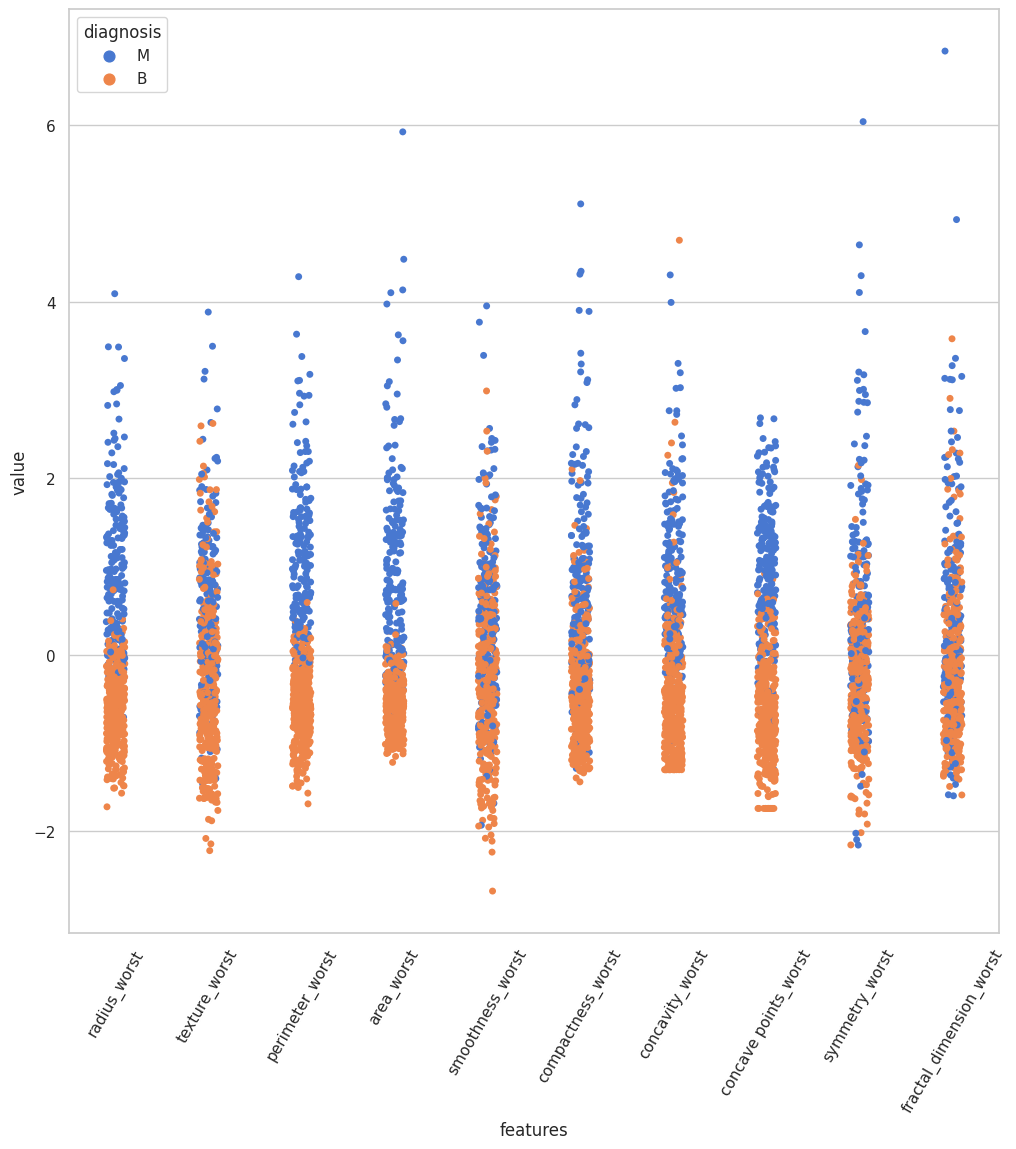

In [21]:
sns.set(style = 'whitegrid', palette = 'muted')
df = x
df_std = (df - df.mean()) / df.std()
df = pd.concat([y, df_std.iloc[:, 20:30]], axis = 1)
df = pd.melt(df, id_vars = 'diagnosis',
             var_name = 'features',
             value_name = 'value')

plt.figure(figsize = (12,12))
sns.stripplot( x ='features', y='value', hue = 'diagnosis', data = df)
plt.xticks(rotation = 60)
plt.show()

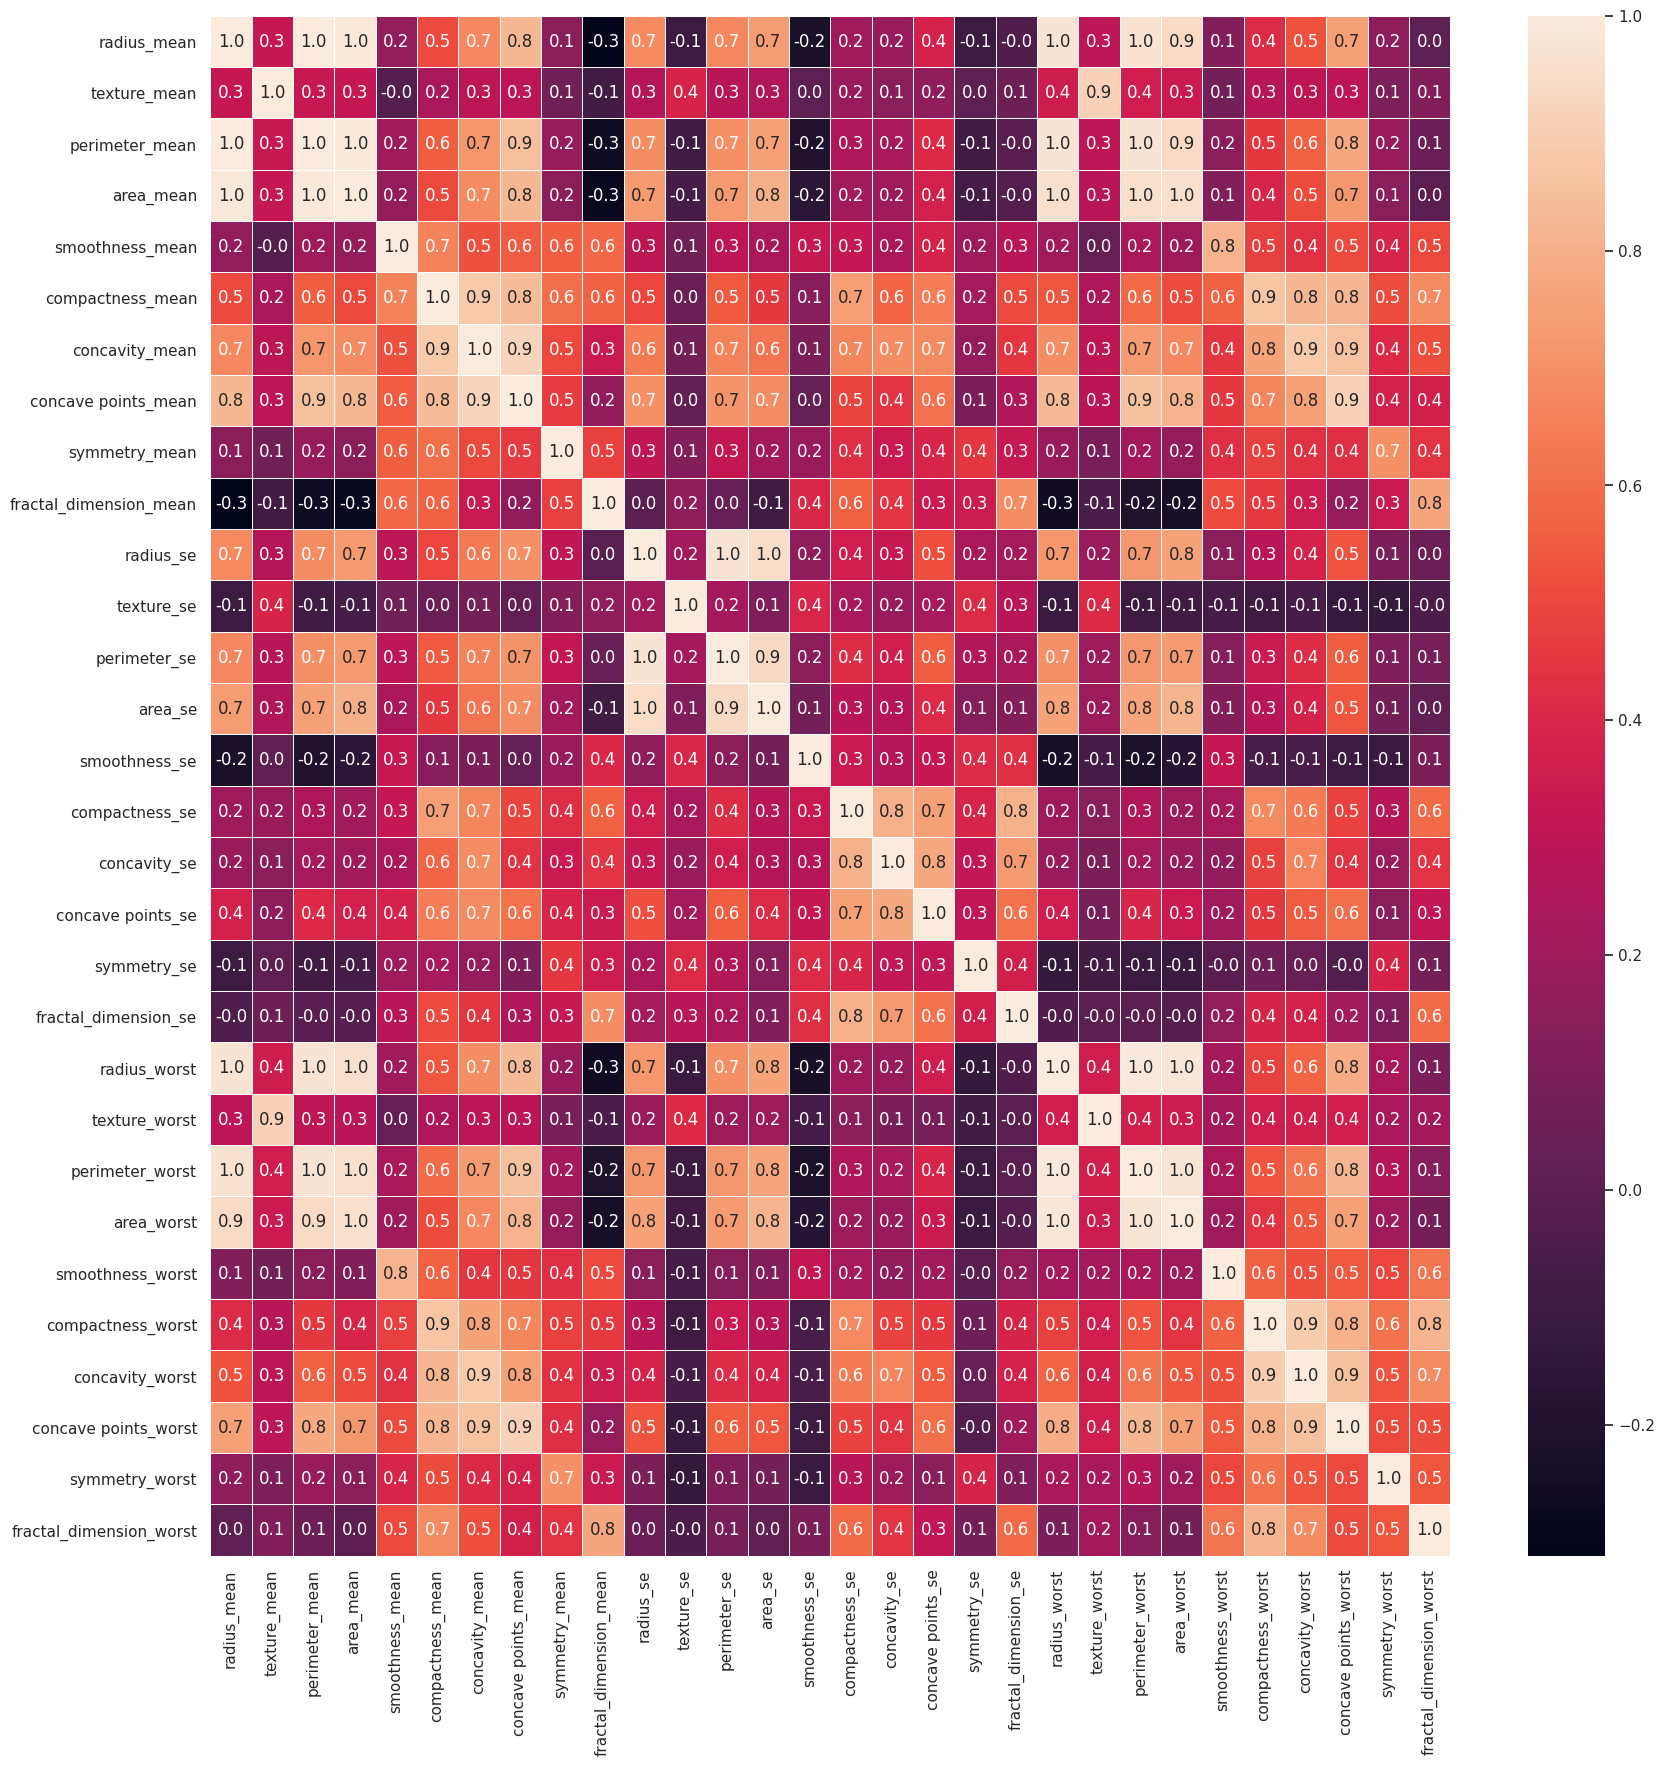

In [28]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)
plt.show()
